In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
import seaborn as sns
from glob import glob
from zimp.pos.wordcount_analyzer import WordCountAnalyzer

plt.style.use('seaborn-whitegrid')

In [8]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'de'
    return 'en'


source_dir = '../../zimp_orchestrator/orch/resources'
rs = []
df_confs = {}
for file in glob('confidence/confidence*.csv'):
    dataset =  file.split('_')[-2]
    train_test = file.split('_')[-1].split('.')[0]
    source_file = os.path.join(source_dir, dataset, train_test + '.csv')
    df_conf = pd.read_csv(file)
    df_text = pd.read_csv(source_file)
    df_conf['txt_len'] = WordCountAnalyzer(df_text.text).extract_batch_metrics() 
    df_confs['_'.join(file.split('_')[1:])[:-4]] = df_conf
    rs.append({
        'pearson_p_true': scipy.stats.pearsonr(df_conf['p_true'], df_conf['txt_len'])[0],
        'spearman_p_true': scipy.stats.spearmanr(df_conf['p_true'], df_conf['txt_len'])[0],
        'pearson_conf': scipy.stats.pearsonr(df_conf['mean'], df_conf['txt_len'])[0],
        'spearman_conf': scipy.stats.spearmanr(df_conf['mean'], df_conf['txt_len'])[0],
        'model': '_'.join(file.split('_')[1:-2]),
        'dataset': dataset,
        'train_test': train_test,
        'language': get_ds_language(file.split('_')[-2])
    }) 
    
df_corr = pd.DataFrame(rs)
df_corr

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf,model,dataset,train_test,language
0,-0.033047,-0.033889,-0.067465,-0.120873,BERT,DBP-14,test,en
1,-0.026483,-0.028878,-0.060273,-0.121935,BERT,DBP-14,train,en
2,-0.098306,-0.135927,-0.038605,0.004233,BERT,TREC-6,test,en
3,-0.008824,-0.014086,0.030341,0.024418,BERT,TREC-6,train,en
4,-0.014582,-0.016476,-0.133666,-0.181062,BERT,YELP-5,test,en
5,-0.091733,-0.090960,-0.180141,-0.229054,BERT,YELP-5,train,en
6,0.002920,-0.005202,0.064518,0.073385,DECISION_TREE,10K-GNAD,test,de
7,0.006411,0.017969,0.056898,0.084732,DECISION_TREE,10K-GNAD,train,de
8,-0.034488,-0.035154,0.021644,-0.004468,DECISION_TREE,DBP-14,test,en
9,-0.049095,-0.050528,0.013274,-0.009942,DECISION_TREE,DBP-14,train,en


In [14]:
df_corr[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()

pearson_p_true    -0.012979
spearman_p_true   -0.013388
pearson_conf      -0.020294
spearman_conf     -0.070510
dtype: float64

In [15]:
df_model_corr = df_corr.groupby(['model'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()
df_model_corr

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf
model,,,,
BERT,-0.045496,-0.053369,-0.074968,-0.104046
DECISION_TREE,-0.029303,-0.034542,0.006146,0.003950
FASTTEXT,-0.060415,-0.066631,-0.223560,-0.316752
GERMAN_BERT,0.015477,0.029107,0.052162,0.055103
RANDOM_FOREST,0.039073,0.038452,0.216651,0.121115
SVM,0.000759,0.007912,-0.089304,-0.136393


In [25]:
def get_latex_method_name(model_type):
    if model_type == 'GERMAN_BERT':
        return 'GER\_BERT'
    elif model_type == 'DECISION_TREE':
        return 'DT'
    elif model_type == 'RANDOM_FOREST':
        return 'RF'
    elif model_type == 'FASTTEXT':
        return 'FT'
    elif model_type == 'DUMMY':
        return 'BASE'
    return model_type.replace('_', '\_')

def get_latex_metric(metric_str, max_abs_score, method):
    is_max = np.abs(metric_str) == max_abs_score
    
    metric_str = np.round(metric_str,3)
    if is_max:
        return '\mathbf{' + str(metric_str) + '}'
    return metric_str

In [26]:
reported_methods = ['DUMMY', 'DECISION_TREE', 'RANDOM_FOREST', 'SVM', 'FASTTEXT', 'BERT', 'GERMAN_BERT']
print("""
\\begin{table}[]
    \small
    \centering
    \\begin{tabular}{l|cc|cc}
        Method & $r$ & $\\rho$ & $r'$ & $\\rho'$ \\\\ \hline
""")

for method in reported_methods:
    if method not in df_model_corr.index:
        continue
    s = ' ' * 8
    s += '\\textit{' + get_latex_method_name(method) + '} & '
    s += ' & '.join([f'${get_latex_metric(df_model_corr.loc[method, metric], df_model_corr.abs().max()[metric], method)}$' for metric in df_model_corr.columns])
    s +=  ' \\\\'
    print(s)

print("""
    \end{tabular}
    \caption[Correlation between word count and classification metrics]{Pearson and Spearman correlation coefficients for word counts and the ratio of correct model instances $(r, \\rho)$, and the average prediction confidence $(r', \\rho')$}
    \label{tab:corr_wcount}
\end{table}
""")


\begin{table}[]
    \small
    \centering
    \begin{tabular}{l|cc|cc}
        Method & $r$ & $\rho$ & $r'$ & $\rho'$ \\ \hline

        \textit{DT} & $-0.029$ & $-0.035$ & $0.006$ & $0.004$ \\
        \textit{RF} & $0.039$ & $0.038$ & $0.217$ & $0.121$ \\
        \textit{SVM} & $0.001$ & $0.008$ & $-0.089$ & $-0.136$ \\
        \textit{FT} & $\mathbf{-0.06}$ & $\mathbf{-0.067}$ & $\mathbf{-0.224}$ & $\mathbf{-0.317}$ \\
        \textit{BERT} & $-0.045$ & $-0.053$ & $-0.075$ & $-0.104$ \\
        \textit{GER\_BERT} & $0.015$ & $0.029$ & $0.052$ & $0.055$ \\

    \end{tabular}
    \caption[Correlation between word count and classification metrics]{Pearson and Spearman correlation coefficients for word counts and the ratio of correct model instances $(r, \rho)$, and the average prediction confidence $(r', \rho')$}
    \label{tab:corr_wcount}
\end{table}



In [18]:
df_corr.groupby(['dataset'])[['pearson_p_true', 'spearman_p_true', 'pearson_conf', 'spearman_conf']].mean()

,pearson_p_true,spearman_p_true,pearson_conf,spearman_conf
dataset,,,,
10K-GNAD,-0.007229,-0.003526,-0.072052,-0.099902
DBP-14,-0.028740,-0.031498,-0.032116,-0.128895
GERMEVAL-2018,0.012483,0.018328,-0.013700,-0.086620
GERMEVAL-2020,0.031781,0.042875,0.118628,0.136079
TREC-6,-0.079930,-0.111904,-0.158827,-0.154664
YELP-5,-0.006239,0.005396,0.036302,-0.089060


<AxesSubplot:xlabel='txt_len', ylabel='mean'>

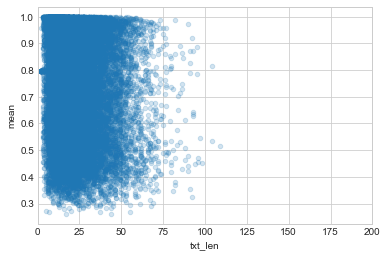

In [19]:
df_confs['FASTTEXT_GERMEVAL-2020_test'].plot(x='txt_len', y='mean', kind='scatter', alpha=.2, xlim=(0,200))

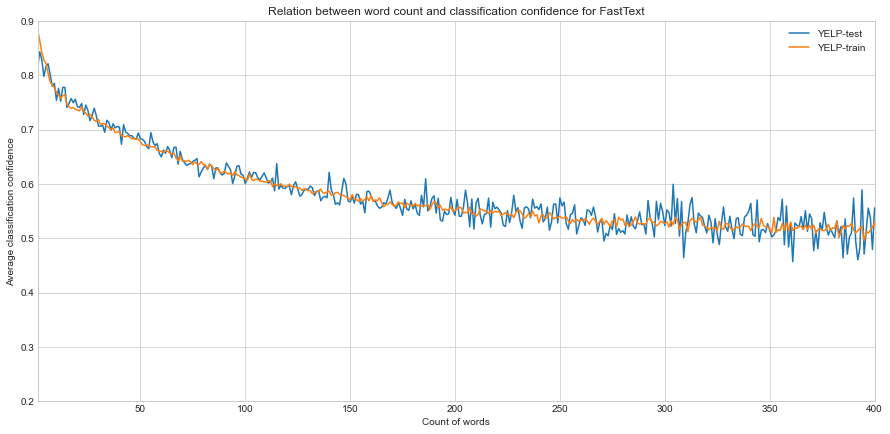

In [28]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ds_keys = [ds for ds in df_confs if 'FASTTEXT_YELP' in ds]
for ds in ds_keys:
    df_confs[ds].groupby(['txt_len'])['mean'].mean().plot(ax=ax, xlim=(1,400), ylim=(0.2,0.9))
    
plt.title('Relation between word count and classification confidence for FastText')
plt.xlabel('Count of words')
plt.ylabel('Average classification confidence')
ax.legend(['YELP-test', 'YELP-train'])
plt.savefig(f'confidence/010_corr_wordcount_yelp.pdf')
plt.show()

In [10]:
df_confs['FASTTEXT_DBP-14_test'].groupby(['txt_len'])['mean'].mean().plot(ax=ax)

<AxesSubplot:title={'center':'Relation between text length and classification confidence for FastText'}, xlabel='txt_len', ylabel='Average classification confidence'>